In [1]:
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'  # always print last expr.
%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging

logging.basicConfig(level=logging.INFO)

In [1]:
import numpy as np
import pandas as pd
import torch

from tsdm.encoders.numerical import BoundaryEncoder, MinMaxScaler, get_broadcast, invert_axes

Creating folder PosixPath('/home/rscholz/.tsdm/datasets').
Creating folder PosixPath('/home/rscholz/.tsdm/models').
Creating folder PosixPath('/home/rscholz/.tsdm/logs').
Creating folder PosixPath('/home/rscholz/.tsdm/rawdata').


/home/rscholz/Projects/KIWI/tsdm/src/tsdm/utils/data/_data.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-06-23 18:55:33.426384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
shape = (3, 2, 1, 2)
axis = None

arr = np.random.randn(*shape)
broadcast = get_broadcast(arr.shape, axis=axis)
m = np.mean(arr, axis=axis)
m_ref = np.mean(arr, axis=axis, keepdims=True)
assert m[broadcast].shape == m_ref.shape

In [3]:
X = np.random.randn(10)
encoder = MinMaxScaler(axis=None)
encoder.fit(X)
encoded = encoder.encode(X)
decoded = encoder.decode(encoded)

self.axis=None  axes=()


/home/rscholz/Projects/KIWI/tsdm/src/tsdm/encoders/numerical.py:819: RuntimeWarning: divide by zero encountered in divide
  self.scale = np.where(dx, dy / dx, np.ones_like(dx))


In [11]:
invert_axes(3, ())

(0, 1, 2)

In [13]:
2 not in ()

True

In [5]:
encoder.xmin

-1.8504084299334762

(0,)

In [11]:
X = np.random.randn(100, 5)
encoder = MinMaxScaler(axis=-1)
encoder.fit(X)
encoded = encoder.encode(X)
decoded = encoder.decode(encoded)

self.axis=-1  axes=(0,)


In [25]:
np.std([1.1])

0.0

In [31]:
x = {1,2}

In [38]:
match {2,1}:
    case {1,2}:
        print("sets are unordered")
    case (2, 1):
        print("sad trombone")

SyntaxError: invalid syntax (2385539737.py, line 2)

In [41]:
match {2:0, 1:0}:
    case {1:0, 2:0}:
        print("Sets are unordered!")

Sets are unordered!


In [50]:
pd.DataFrame.where(s.to_frame(), m, 0)

,0
0,0
1,0
2,3


In [48]:
s = pd.Series([1,2,3])
m = s > 2

In [52]:
x = lambda s=0: s

In [27]:
torch.tensor([1.3, 0.0]).to(bool)

tensor([ True, False])

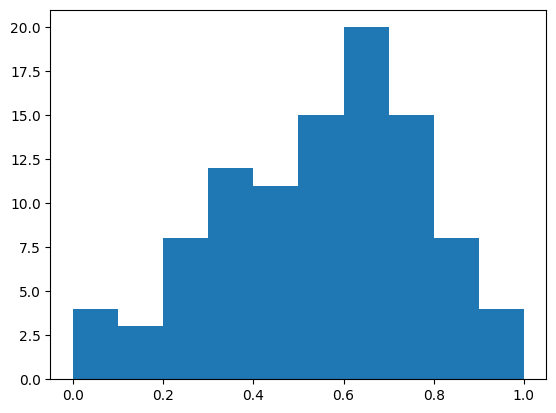

In [23]:
import matplotlib.pyplot as plt

plt.hist(encoded.T[3]);

In [6]:
X = np.random.randn(10)
encoder = MinMaxScaler()
encoder.fit(X)
encoded = encoder.encode(X)
decoded = encoder.decode(encoded)

INFO:tsdm.encoders.numerical.MinMaxScaler:Fitting encoder to data.


self.axis=()  axes=(0,)


array([-0.65559192, -0.43700592, -0.29195274, -0.31231232, -1.18899112,
        1.04356706, -0.63555727,  1.47616824, -1.42742611,  1.18158063])

In [6]:
encoder

MinMaxScaler<dataclass>(
    ymin : ndarray[(5,), float64],
    ymax : ndarray[(5,), float64],
    xmin : ndarray[(5,), float64],
    xmax : ndarray[(5,), float64],
    scale: ndarray[(5,), float64],
    axis : -1
)

In [13]:
get_broadcast(X.shape, axis=encoder.axis)

(slice(None, None, None), None)

In [12]:
get_broadcast((10,5), axis=())

(slice(None, None, None), slice(None, None, None))

In [16]:
arr.shape

(3, 2, 1, 2)

In [21]:
np.mean(arr, axis=(-1, -2)).shape

(3, 2)

In [19]:
def repr_broadcast(x):
    items = (":" if y == slice(None) else str(y) for y in x)
    return f"[{', '.join(items)}]"

In [29]:
for shape in ((3, 4), (7,)):
    for axis in ((1, -1), (-1,), 0, None, ()):
        if isinstance(axis, tuple) and len(axis) > len(shape):
            continue

        broadcast = get_broadcast(shape, axis=axis)
        print(f"{str(shape):16s}{str(axis):16s}{repr_broadcast(broadcast)}")

(3, 4)          (1, -1)         [:, None]
(3, 4)          (-1,)           [:, None]
(3, 4)          0               [None, :]
(3, 4)          None            [None, None]
(3, 4)          ()              [:, :]
(7,)            (-1,)           [None]
(7,)            0               [None]
(7,)            None            [None]
(7,)            ()              [:]


In [30]:
for shape in ((3, 4), (7,)):
    for axis in ((1, -1), (-1,), 0, None, ()):
        if isinstance(axis, tuple) and len(axis) > len(shape):
            continue

        broadcast = get_broadcast(shape, axis=axis, keep_axis=True)
        print(f"{str(shape):16s}{str(axis):16s}{repr_broadcast(broadcast)}")

(3, 4)          (1, -1)         [None, :]
(3, 4)          (-1,)           [None, :]
(3, 4)          0               [:, None]
(3, 4)          None            [:, :]
(3, 4)          ()              [None, None]
(7,)            (-1,)           [:]
(7,)            0               [:]
(7,)            None            [:]
(7,)            ()              [None]


In [16]:
get_broadcast(X.shape, axis=encoder.axis, keep_axis=False)

(None,)

In [32]:
X = np.random.randn(10, 5)
encoder = MinMaxScaler(axis=-1)
encoder.fit(X)

INFO:tsdm.encoders.numerical.MinMaxScaler:Fitting encoder to data.


In [33]:
encoded = encoder.encode(X)
decoded = encoder.decode(encoded)

ValueError: operands could not be broadcast together with shapes (10,5) (5,1) 

In [34]:
get_broadcast(X.shape, axis=encoder.axis, keep_axis=True)

(None, slice(None, None, None))

In [36]:
get_broadcast((10, 5), axis=0)

(None, slice(None, None, None))

In [37]:
get_broadcast((10, 5), axis=-1)

(slice(None, None, None), None)

In [5]:
get_broadcast((7,), axis=None)

(None,)

In [7]:
encoder.encode(X)

ValueError: operands could not be broadcast together with shapes (10,5) (5,1) 

In [10]:
get_broadcast(X.shape, axis=encoder.axis)

(None,)

In [7]:
encoder

MinMaxScaler<dataclass>(
    ymin : 0.0,
    ymax : 1.0,
    xmin : -2.3487750637723197,
    xmax : 2.4128752135108686,
    scale: 0.21001122337160827,
    axis : None
)